# Linear regression

Suppose we want to predict the fat content of a pizza given its calory content
(yes, it is a dummy example)

In [41]:
# Load libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
# Read data
# The data comes from data.world
# https://data.world/sdhilip/pizza-datasets
data = pd.read_csv('../raw_data/Pizza.csv')
data.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [24]:
x = data['cal'].to_numpy().reshape(-1, 1)
y = data['fat'].to_frame().to_numpy()

In [25]:
# Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [26]:
# Train model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_predicted = model.predict(X_train)

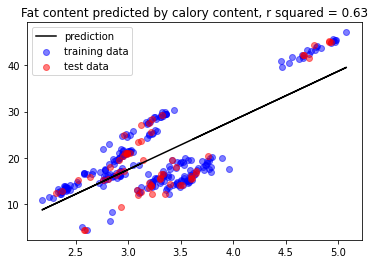

In [40]:
f = plt.figure()
plt.plot(X_train, Y_predicted, color = 'black')
plt.scatter(X_train, Y_train, color = 'blue', alpha = 0.5)
plt.scatter(X_test, Y_test, color = 'red', alpha = 0.5)
plt.legend(['prediction','training data', 'test data'])
plt.title(f'Fat content predicted by calory content, r squared = {round(model.score(X_test, Y_test), 2)}')
plt.show(f)

In [42]:
var_explained = round(sqrt(model.score(X_test, Y_test)), 2)
var_explained 

0.79

Thus, calory content explains 79% of the variance observed in fat content

In [43]:
model.coef_

array([[10.64418859]])

For each unit increase in calory content, there is an increase of 10.6 units of fat